In [3]:
# Import the Python libraries 
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
import yfinance as yf

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Get the stock tickers in the portfolio 
assets = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

In [5]:
# Assign weights to the stocks 
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [6]:
# Get the stock / portfolio starting date 
start_date = '2015-01-01'

In [8]:
end_date = datetime.now()
end_date

datetime.datetime(2023, 11, 28, 1, 0, 53, 141949)

In [9]:
# Create a dataframe to store the adjusted close price of the stocks 
df = pd.DataFrame()

# Store the adjusted close price of the stock into the df
for stock in assets:
    data = yf.download(stock, start=start_date, end=end_date)
    df[stock] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# Show df 
df 

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2015-01-02,24.466446,26.477501,40.452732,15.426000
2015-01-05,23.777189,25.973000,40.080742,15.109500
2015-01-06,23.779428,25.332001,39.492458,14.764500
2015-01-07,24.112871,25.257500,39.994232,14.921000
2015-01-08,25.039339,25.345501,41.170784,15.023000
...,...,...,...,...
2023-11-20,191.449997,136.250000,377.440002,146.130005
2023-11-21,190.639999,136.970001,373.070007,143.899994
2023-11-22,191.309998,138.490005,377.850006,146.710007


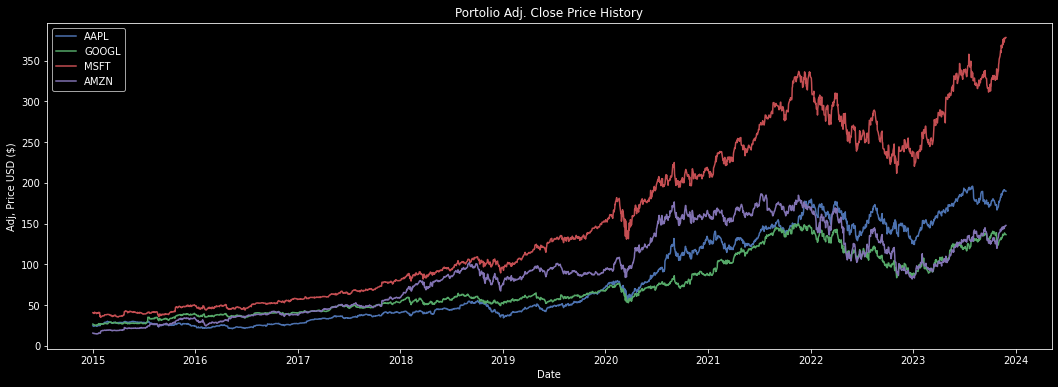

In [11]:
# Visually show the stock / portfolio
title = "Portolio Adj. Close Price History"

# Get the stocks 
my_stocks = df 

# Create the figure 
plt.figure(figsize=(18, 6))

# Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)


plt.title(title)
plt.xlabel('Date')
plt.ylabel('Adj, Price USD ($)')
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [12]:
# Show the daily simple returns
returns = df.pct_change()
returns

,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.019054,-0.009196,-0.020517
2015-01-06,0.000094,-0.024679,-0.014677,-0.022833
2015-01-07,0.014022,-0.002941,0.012706,0.010600
2015-01-08,0.038422,0.003484,0.029418,0.006836
...,...,...,...,...
2023-11-20,0.009278,0.006947,0.020522,0.006544
2023-11-21,-0.004231,0.005284,-0.011578,-0.015260
2023-11-22,0.003514,0.011097,0.012813,0.019528


In [13]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual * 100

,AAPL,GOOGL,MSFT,AMZN
AAPL,8.500764,5.210760,5.674049,5.542400
GOOGL,5.210760,8.154926,5.807359,6.245445
MSFT,5.674049,5.807359,7.801242,6.126180
AMZN,5.542400,6.245445,6.126180,11.149117


In [14]:
# Calculate the portfolio variance 
ptf_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
print("Portfolio Variance:", ptf_variance)

Portfolio Variance: 0.06551152325780277


In [15]:
# Calculate the portfolio volatility (Standard Deviation)
ptf_vol = np.sqrt(ptf_variance)
print("Portfolio Volatility:", ptf_vol)

Portfolio Volatility: 0.25595218939833814


In [16]:
# Calculate the annual portfolio return 
ptf_simple_annual_return = np.sum(returns.mean() * weights) * 252
print("Annual Portfolio Return:", ptf_simple_annual_return)

Annual Portfolio Return: 0.2746600742142573


In [17]:
# Show the expected annual return, volatility (Risk) and variance
percent_var = str(round(ptf_variance * 100, 2)) + '%'
percent_vol = str(round(ptf_vol * 100, 2)) + '%'
percent_ret = str(round(ptf_simple_annual_return * 100, 2)) + '%'

print("Expected Annual Return:", percent_ret)
print("Annual Volatility (Risk):", percent_vol)
print("Annual Variance:", percent_var)

Expected Annual Return: 27.47%
Annual Volatility (Risk): 25.6%
Annual Variance: 6.55%


In [26]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting

In [33]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum sharpe ratio
ef = EfficientFrontier(mu,S,weight_bounds=(None,None))
ef.add_constraint(lambda w: w[0]+w[1]+w[2]+w[3] == 1)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights() 
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('AAPL', 0.28482), ('GOOGL', -0.31596), ('MSFT', 0.73333), ('AMZN', 0.29781)])
Expected annual return: 30.6%
Annual volatility: 28.1%
Sharpe Ratio: 1.02


(0.3058002682649664, 0.2805310174429879, 1.0187831308994177)

In [34]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 1000)

allocation,leftover = da.lp_portfolio()
print('Discrete allocation: ',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'AAPL': 1, 'MSFT': 1, 'AMZN': 2, 'GOOGL': -2}
Funds remaining: $179.28


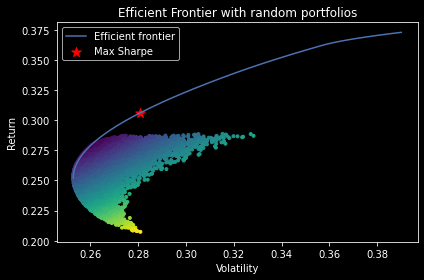

In [43]:
# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Create a new instance of EfficientFrontier for the original optimization
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_constraint(lambda w: w[0] + w[1] + w[2] + w[3] == 1)

# Plot the efficient frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Create a new instance of EfficientFrontier for the tangency portfolio
ef_max_sharpe = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef_max_sharpe.add_constraint(lambda w: w[0] + w[1] + w[2] + w[3] == 1)
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()
